In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1.A** 
Write a code which computes the Taylor Series of $\sin(x^2)$ using recursion and a tolerance based while loop approach.

$$\sin(x^2) \approx \sum_{j=0}^{\infty}\frac{(-1)^j}{(2j+1)!}x^{2j+1}$$
then,
$$\frac{a_{j}}{a_{j-1}} = -\frac{x^4}{(2j+1)!(2j)}$$
and
$$a_0 = x^2, T_0 = x^2$$

In [2]:
def sinxsqrd(x,tol):
    aj = x**2
    tj = x**2
    j = 1
    while (np.abs(aj)>=tol):
        aj *= -x**4 / ((2*j+1)*(2*j))
        tj += aj
        j += 1
    return  tj

**Problem 1.B** 
On the interval $[0,\pi]$ plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$

C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


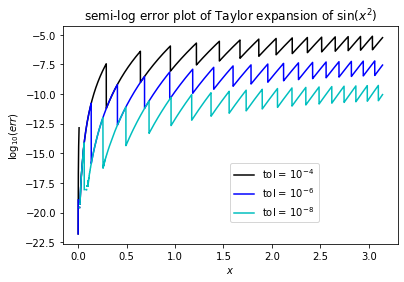

In [3]:
x = np.linspace(0,np.pi,int(1e4))
yreal = np.sin(x**2)
ytol1 = [sinxsqrd(k,1e-4) for k in x]
ytol2 = [sinxsqrd(i,1e-6) for i in x]
ytol3 = [sinxsqrd(j,1e-8) for j in x]
l_err1 = np.log10(np.abs(ytol1 - yreal))
l_err2 = np.log10(np.abs(ytol2 - yreal))
l_err3 = np.log10(np.abs(ytol3 - yreal))

plt.plot(x,l_err1, label = 'tol = $10^{-4}$',c = 'k')
plt.plot(x,l_err2, label = 'tol = $10^{-6}$', c = 'b')
plt.plot(x,l_err3, label = 'tol = $10^{-8}$',c = 'c')
plt.xlabel("$x$")
plt.ylabel("$\log_{10}(err)$")
plt.title("semi-log error plot of Taylor expansion of $\sin(x^2)$")
plt.legend(loc=(.5,0.1))

**Problem 1.C** 
Describe your graphs and comment on any trends you observe.

As the tolerance increases, the accuracy increases (smaller absolute error). For values close to $x=0$, the error is significantly smaller, and increases greatly as  our values move further away from zero.

**Problem 2.A.**
Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value.
    

$$\begin{aligned}\frac{a_m}{a_{m-1}} &= \frac{c_m x^{3m}}{c_{m-1}x^{3(m-1)}}\\
&= \frac{c_m x^3}{c_{m-1}}
\end{aligned}$$
Where,
$$\frac{c_m}{c_{m-1}} = \frac{1}{(3m-1)(3m)}$$
Then,
$$\begin{aligned}a_m = \frac{x^3}{(3m-1)(3m)} a_{m-1} 
\end{aligned}$$
And
$$a_1 = \frac{x^3}{6}, T_1 = 1+\frac{x^3}{6}$$

In [4]:
def airy(x,tol):
    m = 2
    am = x**3/6.
    term = 1 + x**3/6.
    while (np.abs(am)) >= (tol):
        am *= x**3/((3*m-1)*(3*m))
        term += am
        m += 1
    return term

def plotvalues_neg(l,tol):
    x_neg = np.linspace(-l, 0, 100)
    y_neg = [airy(k,tol) for k in x_neg]
    plt.plot(x_neg,y_neg, label = '$L_x = $%d and tol = %1.0e' %(l,tol))
    plt.legend(loc=(.5,0.1))
    plt.title("Airy Function vs. x")
    plt.xlabel("x")
    plt.ylabel("f(x)")
def plotvalues_pos(l,tol):
    x_pos = np.linspace(0,l,100)
    y_pos = [airy(i,tol) for i in x_pos]
    plt.plot(x_pos,y_pos, label = '$L_x = $%d and tol = %1.0e' %(l,tol))
    plt.legend(loc=(.01,0.5))
    plt.title("Airy Function vs. x")
    plt.xlabel("x")
    plt.ylabel("f(x)")

**Problem 2.B.** Provide plots for $L_{x}= 3, 19$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. Add legends to your plots.

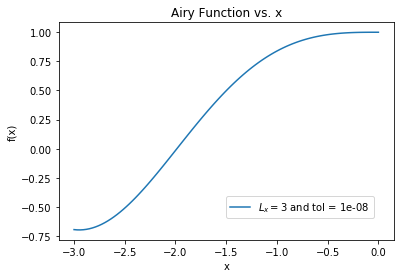

In [5]:
plotvalues_neg(3,1e-8)

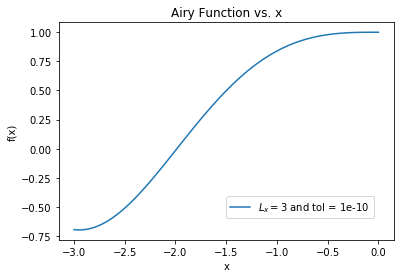

In [6]:
plotvalues_neg(3,1e-10)

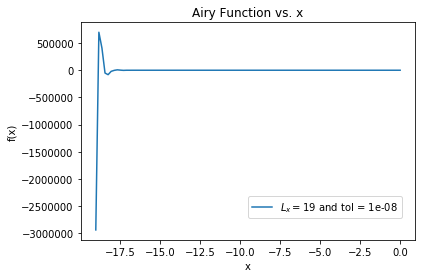

In [7]:
plotvalues_neg(19,1e-8)

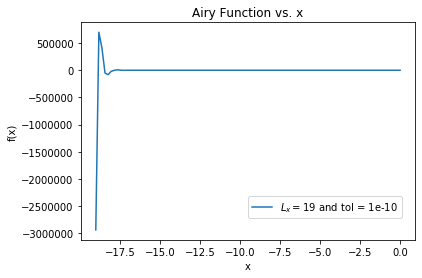

In [8]:
plotvalues_neg(19,1e-10)

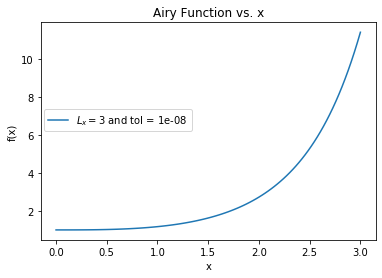

In [9]:
plotvalues_pos(3,1e-8)

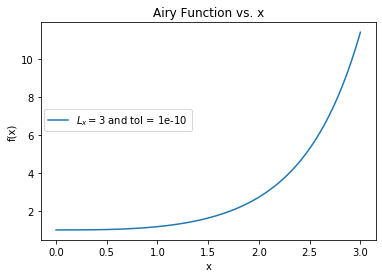

In [10]:
plotvalues_pos(3,1e-10)

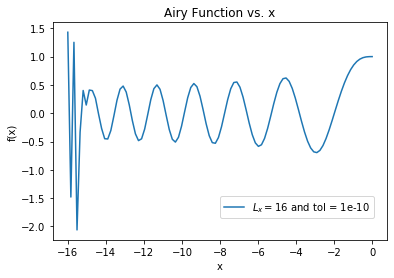

In [11]:
plotvalues_neg(16,1e-10)

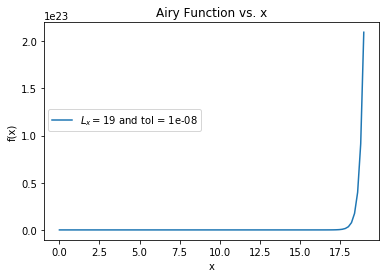

In [12]:
plotvalues_pos(19,1e-8)

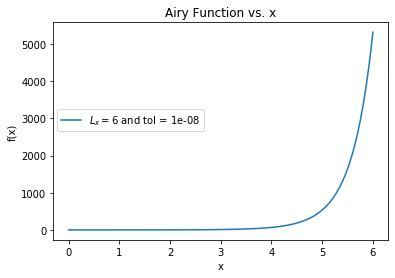

In [13]:
plotvalues_pos(6,1e-8)

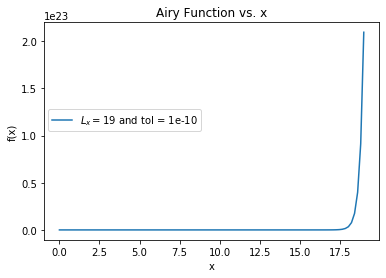

In [14]:
plotvalues_pos(19,1e-10)

For negative $L_x$, we observe that the end behavior approaches $-\infty$, and rapidly increases to over $ 500,000$, and then oscillates around $0$. The behavior in the negative direction for values greater than $x>-17$ can be seen better in the plots because the oscillations are smaller in relation to the oscillations that occur for $L_x = -19$. In the positive direction, we see that the function grows rapidly, almost exponentially.

**Problem 3** 
 If we list all the natural numbers below 15 that are multiples of 4 or 7, we get 4, 7, 8, 12, 14. The sum of these multiples is 45. Find the sum of all multiples of 4 or 7 below 162. Note, you will need to make use of the mod command %, which in effect finds remainders from division. Note the use below. Likewise you will also need to use the logical operation `or`.

In [15]:
def multiples(n):
    v = np.array([])
    for i in range(0,n):
        if ((i%4==0) or (i%7==0)):
            v = np.append(v,i)
    return v
x = multiples(162)
sumx = sum(x)
#print(x)
print(sumx)

4792.0


Using a for loop based approach, write a program which finds:
$$\frac{1}{n}\sum_{j=1}^n\bigg[\bigg(\frac{j}{n}\bigg)^4+3\bigg(\frac{j}{n}\bigg)^2\bigg]$$
for any positive integer n. Generate a labeled plot of the results of your function for $1\leq n\leq 1000$, where n will be on the x-axis, while the results of your function will appear on the y-axis. Describe any trends you see from your graph.

In [16]:
def func(n):
    v = np.zeros(int(n))
    for k in range(0,int(n)):
        v[k] = ((k+1)/n)**4 + 3*((k+1)/n)**2
    return sum(v)/n

Text(0, 0.5, 'function')

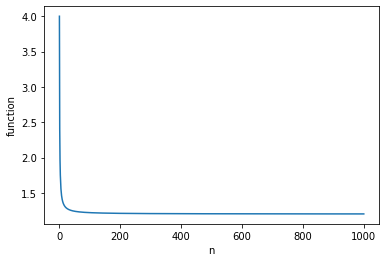

In [17]:
x = np.linspace(1,1000,1000)
y = [func(z) for z in x]
plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('function')